In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [60]:
base_dir = "../data/test_reshaped_images"
# base_dir = "../../trial_folder/reshaped_seismograms/"
#base_dir = "../../filter/NOISE_spec_reshape/"
test_ds = tf.keras.utils.image_dataset_from_directory(base_dir, 
                                      seed = 123,
                                      image_size = (300, 300),
                                      batch_size = 32)

Found 20006 files belonging to 2 classes.


(32, 300, 300, 3)


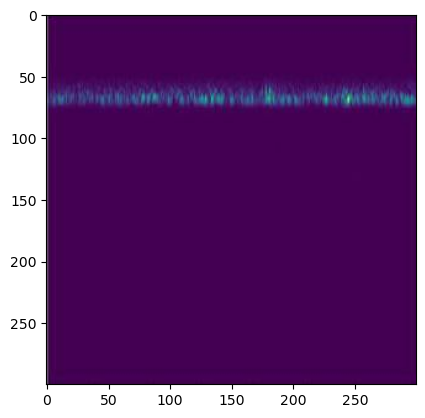

In [64]:
for x, y in test_ds.take(1):
    print(x.shape)
    plt.imshow(x[30].numpy().astype("uint8"))

In [33]:
model = tf.keras.models.load_model('../data/model/cp2_with_layer_names/')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 layer1 (Conv2D)             (None, 300, 300, 8)       608       
                                                                 
 layer2 (MaxPooling2D)       (None, 148, 148, 8)       0         
                                                                 
 layer3 (Conv2D)             (None, 148, 148, 16)      3216      
                                                                 
 layer4 (MaxPooling2D)       (None, 72, 72, 16)        0         
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 layer5 (Dense)              (None, 32)                2

In [72]:
def visualize_conv_layer(layer_name, test_ds, row_size, col_size):
  
  layer_output=model.get_layer(layer_name).output  #get the Output of the Layer

  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output) #Intermediate model between Input Layer and Output Layer which we are concerned about
  for x, y in test_ds.take(1):
    intermediate_prediction=intermediate_model.predict(x) #predicting in the Intermediate Node
    plt.imshow(x[20].numpy().astype("uint8"))
  img_index=0

  print(np.shape(intermediate_prediction))
    #---------------We will subplot the Output of the layer which will be the layer_name----------------------------------#
  
  fig,ax=plt.subplots(row_size,col_size) 

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[20, :, :, img_index], cmap='gray')

      img_index=img_index+1 #Increment the Index number of img_index variable
        
print("Function to Visualize the Output has been Created")

Function to Visualize the Output has been Created


1/1 [==============================] - 0s 58ms/step
(32, 300, 300, 8)


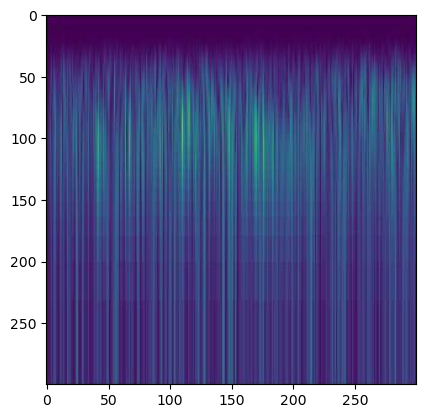

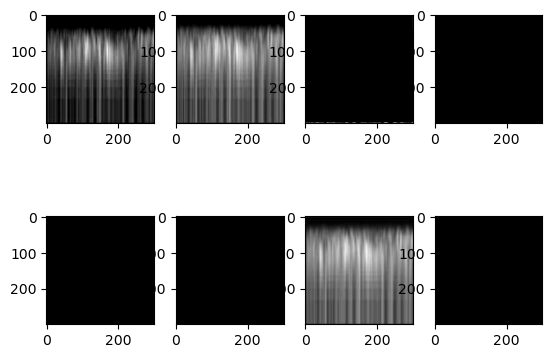

In [73]:
visualize_conv_layer('layer1', test_ds, row_size=2, col_size=4)

In [ ]:
model = tf.keras.models.load_model("../data/model/trial")
base_dir = base_dir + 'EQ/'
file_list = os.listdir(base_dir)
class_names = test_ds.class_names
for file in file_list:
  print(file)
  image = tf.keras.utils.load_img(base_dir+file, target_size=(300, 300))
  input_arr = tf.keras.utils.img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  predictions = model.predict(input_arr) #.argmax(axis = -1)
  print(predictions)